# Modelling and Evaluation

In [1]:
# importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import precision_recall_fscore_support, classification_report, roc_auc_score, confusion_matrix

## Importing Cleaned and Transformed Data

In [2]:
df = pd.read_csv('../Data/data_ready.csv')
df.drop(df.columns[0], inplace = True, axis = 1)
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,...,date_renewal_2015.0,has_gas_f,has_gas_t,origin_up_Miss,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap,price_date_2015.0
0,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
1,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
2,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
3,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1
4,4.310267,0.0,4.001128,335.807483,206.800605,3.179547,2.932604,0.0,62.642961,0.095919,...,1,1,0,0,0,0,1,0,0,1


## Splitting The Data into Train and Test Set

In [3]:
X = df.drop('churn', axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Preparing Evaluation Metrics

In this analysis, we'll be looking at some metrics that we'll use to evaluate how good our model is, we'll made a function so we can use it on different models without writting the code again.

In [4]:
def report(y_test, y_pred, model_name, model):
    
    print('The ROC AUC Score for', model_name, 'is: {:.2f}'.format(roc_auc_score(y_test, y_pred)))
    print('\nConfusion Matrix: ')
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred, labels = [0, 1]), columns = ['Predict 0', 'Predict 1'], index = ['Class 0', 'Class 1'])
    print(conf_mat)

    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
    print('\nMetrics Reports')
    print(classification_report(y_test, y_pred))
    
    try:
        feature_impr = pd.DataFrame(data = model.feature_importances_*100, 
                     index=df.drop('churn', axis = 1).columns.to_list()).rename(columns = {0: 'Feature Importance'}).sort_values(by=['Feature Importance'], ascending=False)

        ax = feature_impr.iloc[0:11, :].plot(kind = 'barh', figsize=(6,6), xlim = [0, feature_impr.iloc[0:11, 0].max() + 5], legend = False)
        plt.title('Top 10 Features for the ' + model_name  + ' Model')

        for i, v in enumerate(feature_impr.iloc[0:11, 0]):
            ax.text(v + 0.25, i + .25, str(round(v, 2)) + ' %', color='black', fontweight='bold')

        plt.gca().invert_yaxis()
        plt.show()
    except:
        print('')

## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression().fit(X_train, y_train)
lr_prediction = clf_lr.predict(X_test)

report(y_test, lr_prediction, 'Logistic Regression', clf_lr)

The ROC AUC Score for Logistic Regression is: 0.50

Confusion Matrix: 
         Predict 0  Predict 1
Class 0      34800          0
Class 1       3801          0

Metrics Reports
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     34800
           1       0.00      0.00      0.00      3801

    accuracy                           0.90     38601
   macro avg       0.45      0.50      0.47     38601
weighted avg       0.81      0.90      0.85     38601




## Decision Tree

The ROC AUC Score for Decision Tree is: 1.00

Confusion Matrix: 
         Predict 0  Predict 1
Class 0      34788         12
Class 1          8       3793

Metrics Reports
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34800
           1       1.00      1.00      1.00      3801

    accuracy                           1.00     38601
   macro avg       1.00      1.00      1.00     38601
weighted avg       1.00      1.00      1.00     38601



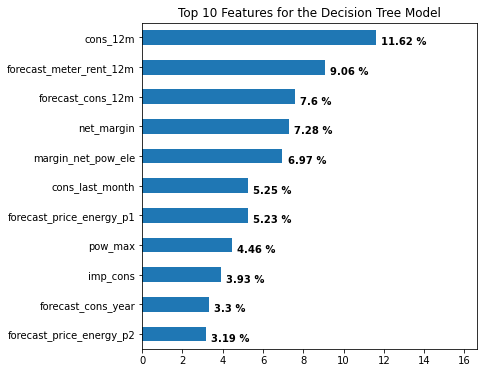

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier().fit(X_train, y_train)

tree_prediction = clf_tree.predict(X_test)

report(y_test, tree_prediction, 'Decision Tree', clf_tree)

## Random Forest

The ROC AUC Score for Random Forest is: 1.00

Confusion Matrix: 
         Predict 0  Predict 1
Class 0      34794          6
Class 1         25       3776

Metrics Reports
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34800
           1       1.00      0.99      1.00      3801

    accuracy                           1.00     38601
   macro avg       1.00      1.00      1.00     38601
weighted avg       1.00      1.00      1.00     38601



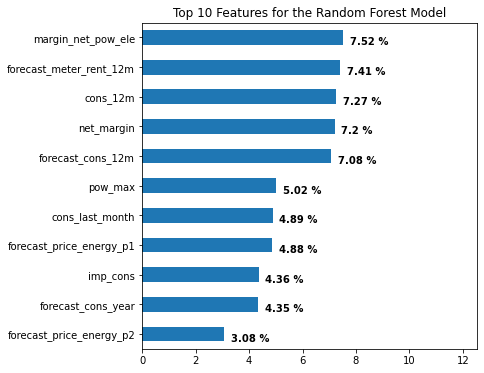

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier().fit(X_train, y_train)

rf_prediction = clf_rf.predict(X_test)

report(y_test, rf_prediction, 'Random Forest', clf_rf)

The ROC AUC Score for Extreme Gradient Boosting is: 0.73

Confusion Matrix: 
         Predict 0  Predict 1
Class 0      34792          8
Class 1       2066       1735

Metrics Reports
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     34800
           1       1.00      0.46      0.63      3801

    accuracy                           0.95     38601
   macro avg       0.97      0.73      0.80     38601
weighted avg       0.95      0.95      0.94     38601



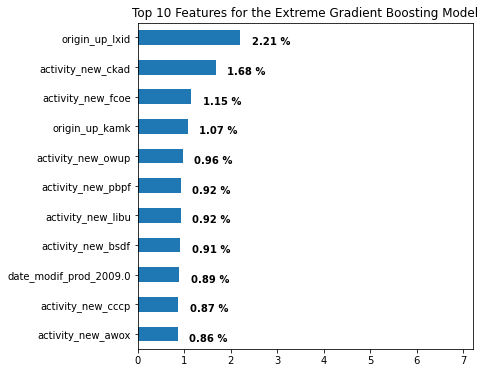

In [8]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier().fit(X_train, y_train, eval_metric = 'logloss')

xgb_prediction = clf_xgb.predict(X_test)

report(y_test, xgb_prediction, 'Extreme Gradient Boosting', clf_xgb)

### From our simple modelling process, we can already see that Random Forest Model can fit to the data pretty well. So in the next step, we shall see whether this model is robust enough by doing cross validation. (Cross Validation will fit the model on different bits of the data, then we'll see the average performance score of these models.)

## Cross Validation

In [9]:
# Stratified K-fold Cross Validation

from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = []
   
cv = KFold(n_splits=10, random_state=1, shuffle=True)

clf_lr = RandomForestClassifier()

# evaluate model
scores = cross_val_score(clf_lr, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, )

# report performance
print('ROC AUC Score: Average of %.3f with standard deviation of %.3f' % (np.mean(scores), np.std(scores)))

ROC AUC Score: Average of 1.000 with standard deviation of 0.000


#### Based on this Cross Validation process, we get a really good classifier performance score. Note that this is a rather optimistic score, when we deploy this model into an unseen data, the performance could drop to a certain degree.

## Receiver Operating Characteristic curve and Area Under Curve Plot

#### A ROC Curve will show the ability of a classifier to diagnose target variable, the AUC score will give us an idea of this classifier performance. A 0.5 AUC score means a classifier is just guessing with a 50:50 chance of getting the right answer,, a good AUC Score is the one that is closer to one.

Random Forest: ROC AUC=1.0000
XGBOOST: ROC AUC=0.9648


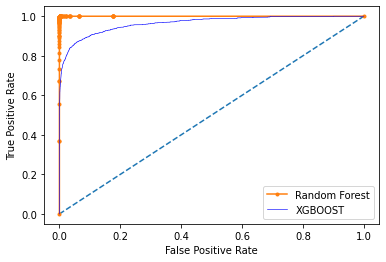

In [10]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rf_probs = clf_rf.predict_proba(X_test)
xgb_probs = clf_xgb.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# summarize scores
# print(': ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.4f' % (rf_auc))
print('XGBOOST: ROC AUC=%.4f' % (xgb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
pyplot.plot(xgb_fpr, xgb_tpr, color = 'blue', linewidth = 0.6, label='XGBOOST', )

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Since our Random Forest Model already perform good, we won't need parameter tuning process to keep this analysis time effecient.

In [11]:
# Save Model

import joblib
filename = './random_forest_classifier.joblib.pkl'
_ = joblib.dump(clf_rf, filename, compress=9)

## After our model is created, we can interpret it and get business values out of it in the next step of our workflow, which is the evaluation process.